In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import qqplot

import CTPLIB as ctp


In [2]:
df = pd.read_csv('data/Countries.csv')

In [3]:
df.head()

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19542982.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,724.145910,29.934415
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19688632.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,718.788917,30.157510
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,NaN,3.854235e+09,9.443391,NaN,...,21000256.0,652860.0,Asia,NaN,NaN,5.268779e+08,3.639705e+08,NaN,183.532775,32.166553
3,Afghanistan,AFG,2003,37.418855,40.717968,13.670101,NaN,4.539497e+09,8.941258,NaN,...,22645130.0,652860.0,Asia,NaN,NaN,6.205538e+08,4.058881e+08,NaN,200.462376,34.686043
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,NaN,5.220825e+09,9.808474,NaN,...,23553551.0,652860.0,Asia,NaN,NaN,7.136921e+08,5.120832e+08,NaN,221.657662,36.077491


In [4]:
condition = df['Year'] == 2021
df[condition]

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
21,Afghanistan,AFG,2021,33.484499,40.717968,10.880110,NaN,1.458314e+10,16.826062,NaN,...,40099462.0,6.528600e+05,Asia,NaN,NaN,1.586661e+09,2.453767e+09,NaN,363.674087,61.421227
44,Albania,ALB,2021,18.358125,64.763660,11.672968,31.309161,1.793057e+10,6.093392,44.708821,...,2811666.0,2.875000e+04,Europe,5.613909e+09,8.016544e+09,2.093029e+09,1.092580e+09,-2.402635e+09,6377.203096,97.797078
67,Algeria,DZA,2021,12.175740,46.736176,16.213169,26.734387,1.634722e+11,5.035450,26.460865,...,44177969.0,2.381740e+06,Africa,4.370330e+10,4.325617e+10,2.650403e+10,8.231563e+09,4.471334e+08,3700.311195,18.548609
90,American Samoa,ASM,2021,NaN,NaN,NaN,47.108604,7.090000e+08,NaN,102.115656,...,45035.0,2.000000e+02,Oceania,3.340000e+08,7.240000e+08,NaN,NaN,-3.900000e+08,15743.310758,225.175000
113,Andorra,AND,2021,0.533618,NaN,10.260000,NaN,3.325145e+09,6.521148,NaN,...,79034.0,4.700000e+02,Europe,NaN,NaN,3.411599e+08,2.168377e+08,NaN,42072.341103,168.157447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,Virgin Islands (U.S.),VIR,2021,NaN,NaN,NaN,171.525704,4.004211e+09,NaN,174.985111,...,105870.0,3.500000e+02,North America,6.868250e+09,7.006772e+09,NaN,NaN,-1.385219e+08,37821.956421,302.485714
5035,West Bank and Gaza,PSE,2021,6.316749,57.715810,16.889268,17.341101,1.810900e+10,NaN,55.742449,...,4922749.0,6.020000e+03,Asia,3.140300e+09,1.009440e+10,3.058478e+09,NaN,-6.954100e+09,3678.635657,817.732392
5058,"Yemen, Rep.",YEM,2021,12.946455,32.668556,19.971232,18.678628,2.474992e+10,5.199995,38.334982,...,32981641.0,5.279700e+05,Asia,4.622945e+09,9.487876e+09,4.942863e+09,1.286994e+09,-4.864931e+09,750.414915,62.468779
5081,Zambia,ZMB,2021,3.393277,63.517218,11.514140,52.078387,2.214765e+10,5.200252,33.913790,...,19473125.0,7.526100e+05,Africa,1.153414e+10,7.511107e+09,2.550111e+09,1.151733e+09,4.023031e+09,1137.344395,25.874125


In [5]:
df_2021 = df[condition]

In [6]:
df_2021.shape

(222, 25)

In [7]:
df_2021.describe()

,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),Industry (% GDP),Inflation Rate,...,Unemployment,Population,Land,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
count,222.0,210.000000,196.000000,206.000000,202.000000,2.190000e+02,197.000000,202.000000,211.000000,198.000000,...,193.000000,2.220000e+02,2.220000e+02,2.020000e+02,2.020000e+02,2.040000e+02,1.970000e+02,2.020000e+02,219.000000,222.000000
mean,2021.0,10.009405,61.738665,14.278610,44.894527,4.517964e+11,6.317331,50.118834,25.995928,8.775023,...,8.018817,3.661181e+07,7.003599e+05,1.404746e+11,1.355368e+11,6.230390e+10,4.534172e+10,4.937783e+09,19081.259666,354.814990
std,0.0,10.045555,13.779703,4.849049,34.868477,2.061593e+12,2.789059,30.697131,12.545838,29.333831,...,5.637546,1.391640e+08,2.121910e+06,3.807024e+11,3.830717e+11,2.852358e+11,2.714773e+11,7.733295e+10,29472.792348,1730.675895
min,2021.0,0.016625,20.116916,3.631880,2.249870,6.019637e+07,1.938383,1.877678,2.758632,-0.772844,...,0.170000,1.120400e+04,1.000000e+01,2.629159e+07,1.403122e+08,5.285715e+06,8.863285e+06,-8.617130e+11,221.157803,0.138027
25%,2021.0,1.947862,53.174205,10.535898,23.348814,7.156814e+09,4.407228,30.322323,17.493367,1.996597,...,4.090000,9.698468e+05,1.136750e+04,3.456452e+09,4.645050e+09,1.189010e+09,5.276283e+08,-2.498887e+09,2628.958033,35.085035
50%,2021.0,6.409288,62.020117,14.020965,36.127932,2.840806e+10,5.585032,43.335409,24.303360,3.591035,...,6.180000,6.719538e+06,9.930776e+04,1.511352e+10,1.582050e+10,5.003047e+09,2.082918e+09,-2.867972e+08,7060.897609,91.501500
75%,2021.0,15.514157,72.535918,17.849345,55.524946,2.037287e+11,8.145425,61.533336,32.375407,6.650299,...,10.542000,2.590095e+07,4.778918e+05,8.177093e+10,7.533883e+10,3.048165e+10,1.336390e+10,2.977640e+09,23435.586836,222.825815
max,2021.0,57.448787,87.018468,33.832100,211.433432,2.331508e+13,16.826062,198.469708,79.960875,359.093041,...,28.770000,1.412360e+09,1.709825e+07,3.554108e+12,3.401361e+12,3.358346e+12,3.631518e+12,4.608294e+11,234317.084818,23521.610114


In [8]:
df_2021

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
21,Afghanistan,AFG,2021,33.484499,40.717968,10.880110,NaN,1.458314e+10,16.826062,NaN,...,40099462.0,6.528600e+05,Asia,NaN,NaN,1.586661e+09,2.453767e+09,NaN,363.674087,61.421227
44,Albania,ALB,2021,18.358125,64.763660,11.672968,31.309161,1.793057e+10,6.093392,44.708821,...,2811666.0,2.875000e+04,Europe,5.613909e+09,8.016544e+09,2.093029e+09,1.092580e+09,-2.402635e+09,6377.203096,97.797078
67,Algeria,DZA,2021,12.175740,46.736176,16.213169,26.734387,1.634722e+11,5.035450,26.460865,...,44177969.0,2.381740e+06,Africa,4.370330e+10,4.325617e+10,2.650403e+10,8.231563e+09,4.471334e+08,3700.311195,18.548609
90,American Samoa,ASM,2021,NaN,NaN,NaN,47.108604,7.090000e+08,NaN,102.115656,...,45035.0,2.000000e+02,Oceania,3.340000e+08,7.240000e+08,NaN,NaN,-3.900000e+08,15743.310758,225.175000
113,Andorra,AND,2021,0.533618,NaN,10.260000,NaN,3.325145e+09,6.521148,NaN,...,79034.0,4.700000e+02,Europe,NaN,NaN,3.411599e+08,2.168377e+08,NaN,42072.341103,168.157447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,Virgin Islands (U.S.),VIR,2021,NaN,NaN,NaN,171.525704,4.004211e+09,NaN,174.985111,...,105870.0,3.500000e+02,North America,6.868250e+09,7.006772e+09,NaN,NaN,-1.385219e+08,37821.956421,302.485714
5035,West Bank and Gaza,PSE,2021,6.316749,57.715810,16.889268,17.341101,1.810900e+10,NaN,55.742449,...,4922749.0,6.020000e+03,Asia,3.140300e+09,1.009440e+10,3.058478e+09,NaN,-6.954100e+09,3678.635657,817.732392
5058,"Yemen, Rep.",YEM,2021,12.946455,32.668556,19.971232,18.678628,2.474992e+10,5.199995,38.334982,...,32981641.0,5.279700e+05,Asia,4.622945e+09,9.487876e+09,4.942863e+09,1.286994e+09,-4.864931e+09,750.414915,62.468779
5081,Zambia,ZMB,2021,3.393277,63.517218,11.514140,52.078387,2.214765e+10,5.200252,33.913790,...,19473125.0,7.526100e+05,Africa,1.153414e+10,7.511107e+09,2.550111e+09,1.151733e+09,4.023031e+09,1137.344395,25.874125


In [9]:
df_2021 = df_2021.rename(columns={
    "Country Name": "country_name", 
    "Country Code": "country_code",
    "Year": "year",
    "Agriculture (% GDP)": "agriculture_percentage_gdp",
    "Ease of Doing Business": "ease_of_doing_business",
    "Education Expenditure (% GDP)": "education_expenditure_percentage_gdp",
    "Export (% GDP)": "export_percentage_gdp",
    "GDP": "gdp",
    "Health Expenditure (% GDP)": "health_expenditure_percentage_gdp",
    "Import (% GDP)": "import_percentage_gdp",
    "Population": "population",
    "Land": "land",
    "Continent Name": "continent_land",
    "Export": "export",
    "Import": "import",
    "Education Expenditure": "education_expenditure",
    "Health Expenditure": "health_expenditure",
    "Net Trade": "net_trade",
    "GDP Per Capita": "gdp_per_capita",
    "Population Density": "population_density"
    
})
df_2021

,country_name,country_code,year,agriculture_percentage_gdp,ease_of_doing_business,education_expenditure_percentage_gdp,export_percentage_gdp,gdp,health_expenditure_percentage_gdp,import_percentage_gdp,...,population,land,continent_land,export,import,education_expenditure,health_expenditure,net_trade,gdp_per_capita,population_density
21,Afghanistan,AFG,2021,33.484499,40.717968,10.880110,NaN,1.458314e+10,16.826062,NaN,...,40099462.0,6.528600e+05,Asia,NaN,NaN,1.586661e+09,2.453767e+09,NaN,363.674087,61.421227
44,Albania,ALB,2021,18.358125,64.763660,11.672968,31.309161,1.793057e+10,6.093392,44.708821,...,2811666.0,2.875000e+04,Europe,5.613909e+09,8.016544e+09,2.093029e+09,1.092580e+09,-2.402635e+09,6377.203096,97.797078
67,Algeria,DZA,2021,12.175740,46.736176,16.213169,26.734387,1.634722e+11,5.035450,26.460865,...,44177969.0,2.381740e+06,Africa,4.370330e+10,4.325617e+10,2.650403e+10,8.231563e+09,4.471334e+08,3700.311195,18.548609
90,American Samoa,ASM,2021,NaN,NaN,NaN,47.108604,7.090000e+08,NaN,102.115656,...,45035.0,2.000000e+02,Oceania,3.340000e+08,7.240000e+08,NaN,NaN,-3.900000e+08,15743.310758,225.175000
113,Andorra,AND,2021,0.533618,NaN,10.260000,NaN,3.325145e+09,6.521148,NaN,...,79034.0,4.700000e+02,Europe,NaN,NaN,3.411599e+08,2.168377e+08,NaN,42072.341103,168.157447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,Virgin Islands (U.S.),VIR,2021,NaN,NaN,NaN,171.525704,4.004211e+09,NaN,174.985111,...,105870.0,3.500000e+02,North America,6.868250e+09,7.006772e+09,NaN,NaN,-1.385219e+08,37821.956421,302.485714
5035,West Bank and Gaza,PSE,2021,6.316749,57.715810,16.889268,17.341101,1.810900e+10,NaN,55.742449,...,4922749.0,6.020000e+03,Asia,3.140300e+09,1.009440e+10,3.058478e+09,NaN,-6.954100e+09,3678.635657,817.732392
5058,"Yemen, Rep.",YEM,2021,12.946455,32.668556,19.971232,18.678628,2.474992e+10,5.199995,38.334982,...,32981641.0,5.279700e+05,Asia,4.622945e+09,9.487876e+09,4.942863e+09,1.286994e+09,-4.864931e+09,750.414915,62.468779
5081,Zambia,ZMB,2021,3.393277,63.517218,11.514140,52.078387,2.214765e+10,5.200252,33.913790,...,19473125.0,7.526100e+05,Africa,1.153414e+10,7.511107e+09,2.550111e+09,1.151733e+09,4.023031e+09,1137.344395,25.874125


In [10]:
df_2021 = df_2021.replace(np.NaN,0)
df_2021

,country_name,country_code,year,agriculture_percentage_gdp,ease_of_doing_business,education_expenditure_percentage_gdp,export_percentage_gdp,gdp,health_expenditure_percentage_gdp,import_percentage_gdp,...,population,land,continent_land,export,import,education_expenditure,health_expenditure,net_trade,gdp_per_capita,population_density
21,Afghanistan,AFG,2021,33.484499,40.717968,10.880110,0.000000,1.458314e+10,16.826062,0.000000,...,40099462.0,6.528600e+05,Asia,0.000000e+00,0.000000e+00,1.586661e+09,2.453767e+09,0.000000e+00,363.674087,61.421227
44,Albania,ALB,2021,18.358125,64.763660,11.672968,31.309161,1.793057e+10,6.093392,44.708821,...,2811666.0,2.875000e+04,Europe,5.613909e+09,8.016544e+09,2.093029e+09,1.092580e+09,-2.402635e+09,6377.203096,97.797078
67,Algeria,DZA,2021,12.175740,46.736176,16.213169,26.734387,1.634722e+11,5.035450,26.460865,...,44177969.0,2.381740e+06,Africa,4.370330e+10,4.325617e+10,2.650403e+10,8.231563e+09,4.471334e+08,3700.311195,18.548609
90,American Samoa,ASM,2021,0.000000,0.000000,0.000000,47.108604,7.090000e+08,0.000000,102.115656,...,45035.0,2.000000e+02,Oceania,3.340000e+08,7.240000e+08,0.000000e+00,0.000000e+00,-3.900000e+08,15743.310758,225.175000
113,Andorra,AND,2021,0.533618,0.000000,10.260000,0.000000,3.325145e+09,6.521148,0.000000,...,79034.0,4.700000e+02,Europe,0.000000e+00,0.000000e+00,3.411599e+08,2.168377e+08,0.000000e+00,42072.341103,168.157447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,Virgin Islands (U.S.),VIR,2021,0.000000,0.000000,0.000000,171.525704,4.004211e+09,0.000000,174.985111,...,105870.0,3.500000e+02,North America,6.868250e+09,7.006772e+09,0.000000e+00,0.000000e+00,-1.385219e+08,37821.956421,302.485714
5035,West Bank and Gaza,PSE,2021,6.316749,57.715810,16.889268,17.341101,1.810900e+10,0.000000,55.742449,...,4922749.0,6.020000e+03,Asia,3.140300e+09,1.009440e+10,3.058478e+09,0.000000e+00,-6.954100e+09,3678.635657,817.732392
5058,"Yemen, Rep.",YEM,2021,12.946455,32.668556,19.971232,18.678628,2.474992e+10,5.199995,38.334982,...,32981641.0,5.279700e+05,Asia,4.622945e+09,9.487876e+09,4.942863e+09,1.286994e+09,-4.864931e+09,750.414915,62.468779
5081,Zambia,ZMB,2021,3.393277,63.517218,11.514140,52.078387,2.214765e+10,5.200252,33.913790,...,19473125.0,7.526100e+05,Africa,1.153414e+10,7.511107e+09,2.550111e+09,1.151733e+09,4.023031e+09,1137.344395,25.874125


In [13]:
X_var = ['agriculture_percentage_gdp', 'ease_of_doing_business', 'education_expenditure', 
                 'export_percentage_gdp', 'health_expenditure_percentage_gdp', 'import_percentage_gdp',
                 'population', 'land', 'export', 'import', 'education_expenditure', 
                'health_expenditure', 'net_trade', 'population_density']
y_var = 'gdp'

print(type(y_var))

<class 'str'>


                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2669.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          2.52e-221
Time:                        18:51:21   Log-Likelihood:                -6048.5
No. Observations:                 222   AIC:                         1.212e+04
Df Residuals:                     209   BIC:                         1.217e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

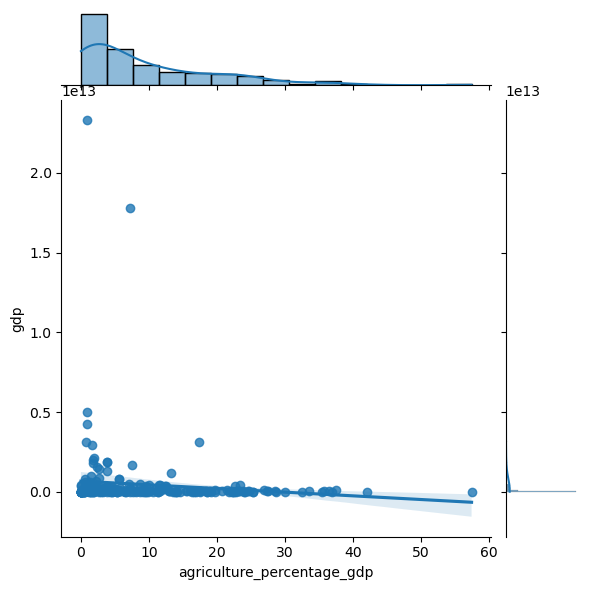

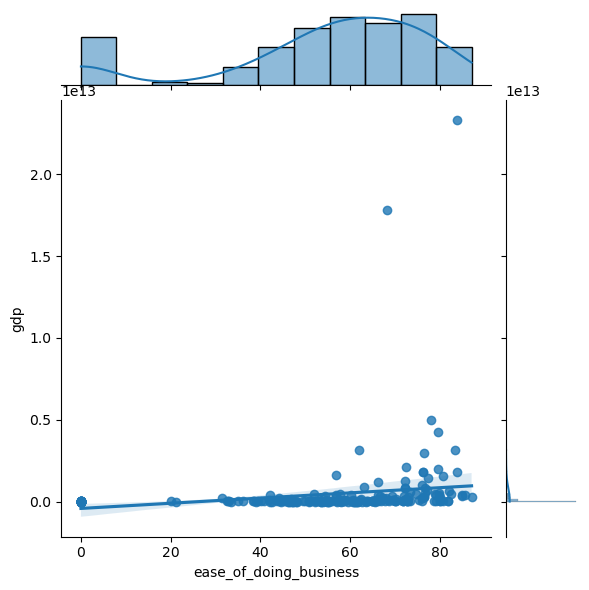

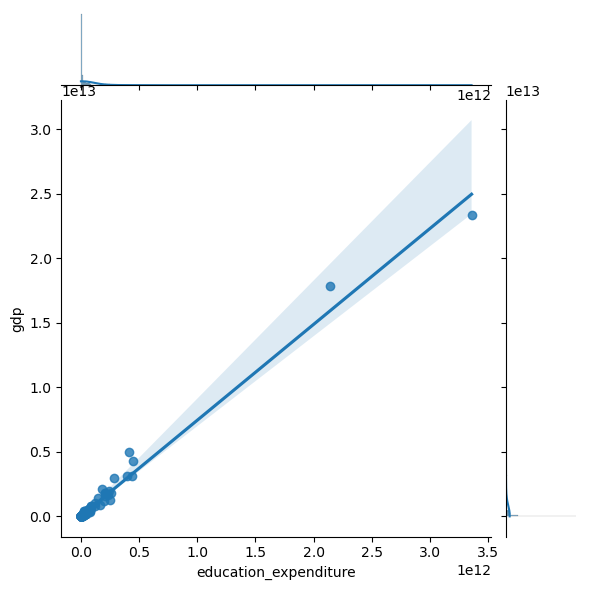

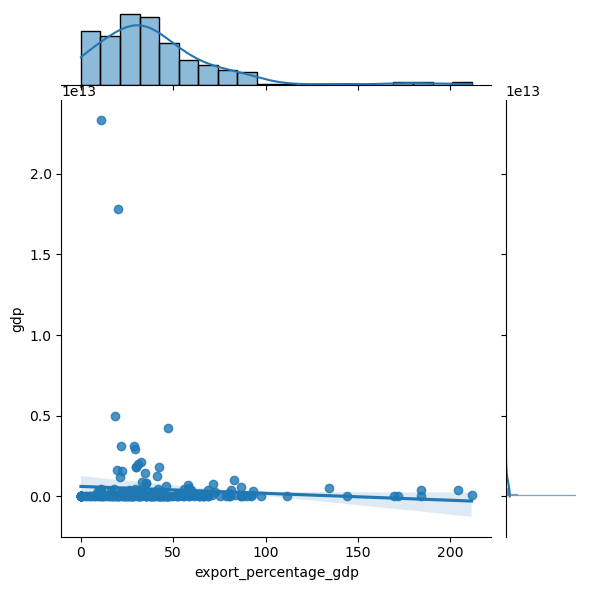

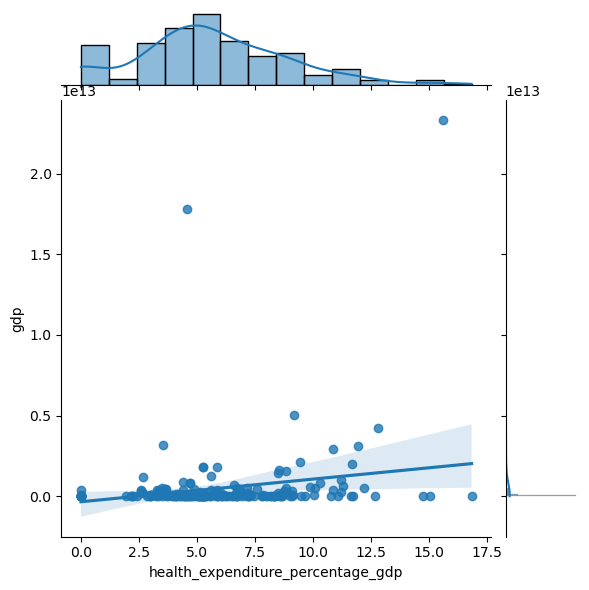

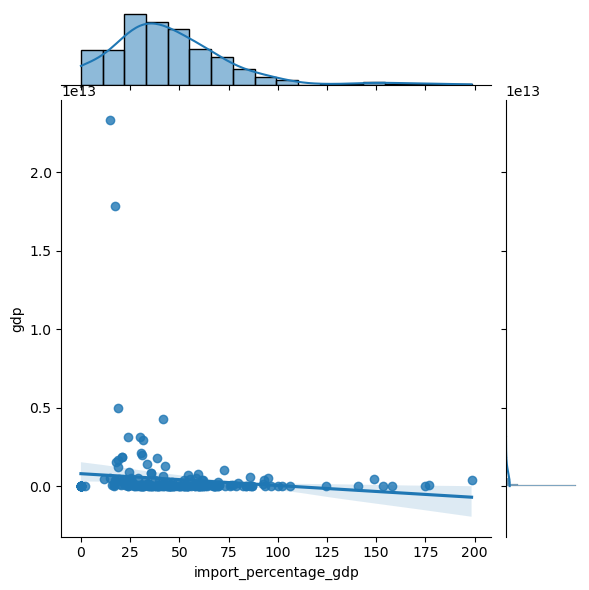

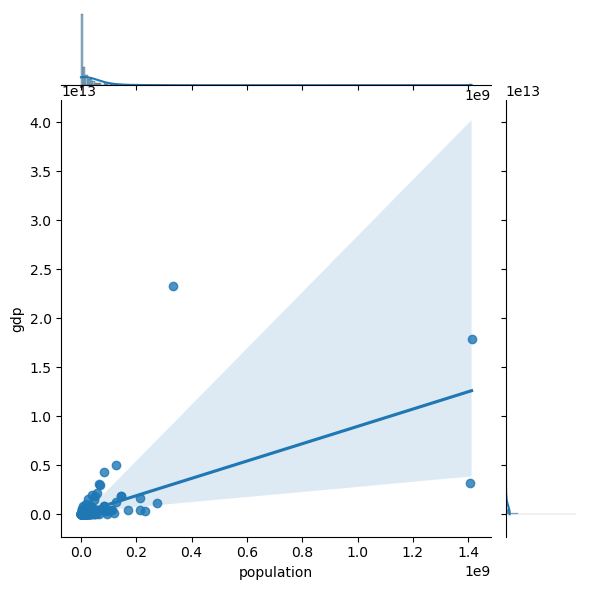

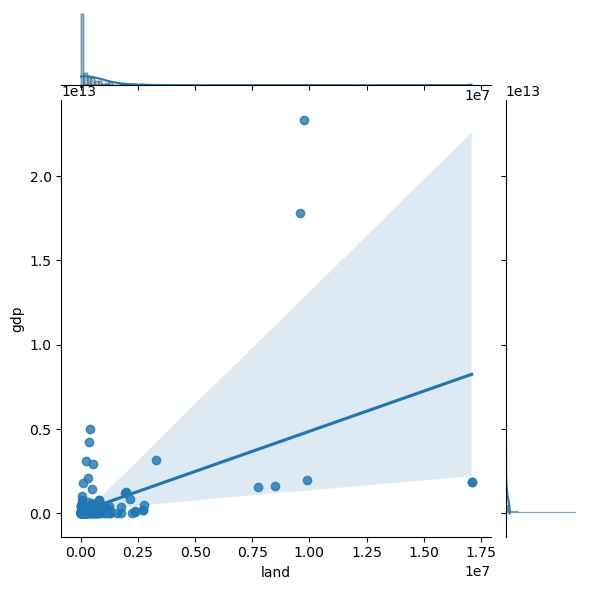

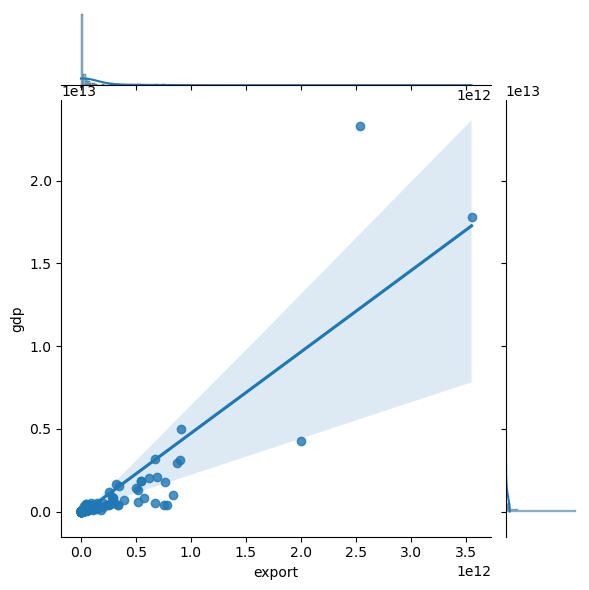

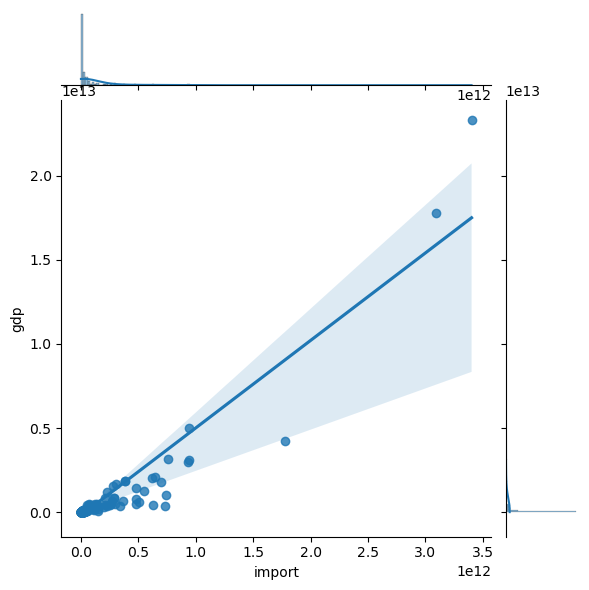

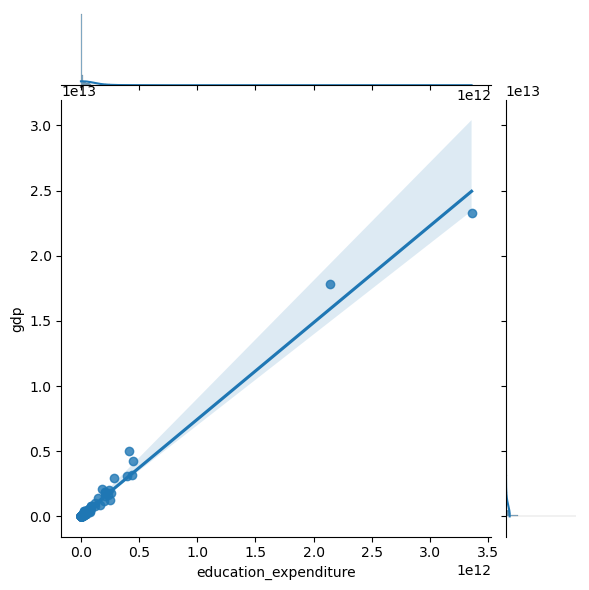

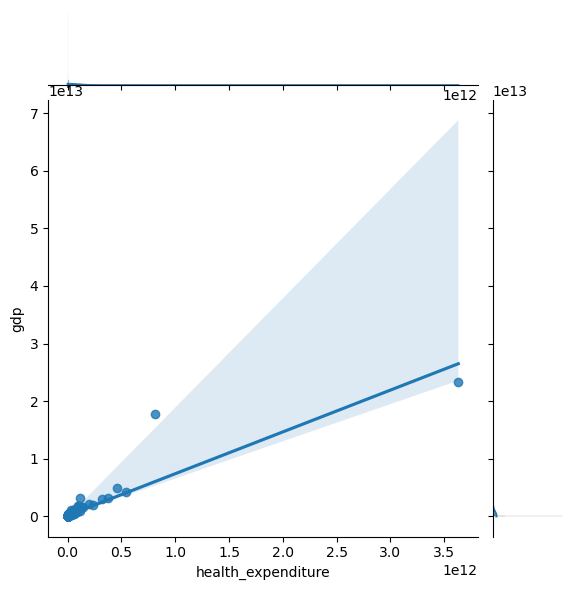

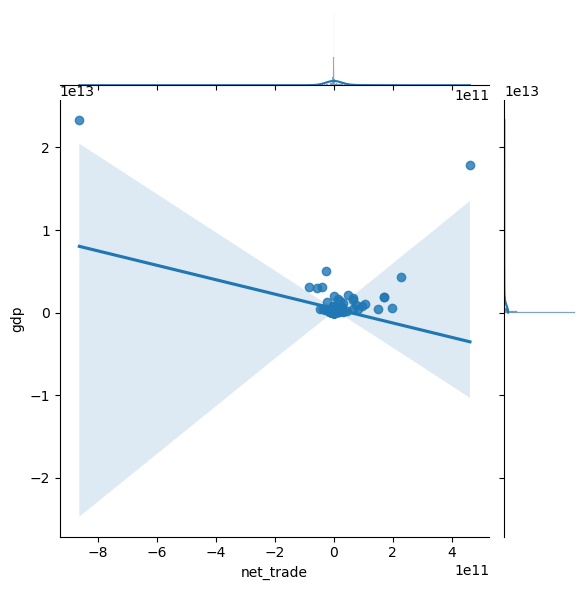

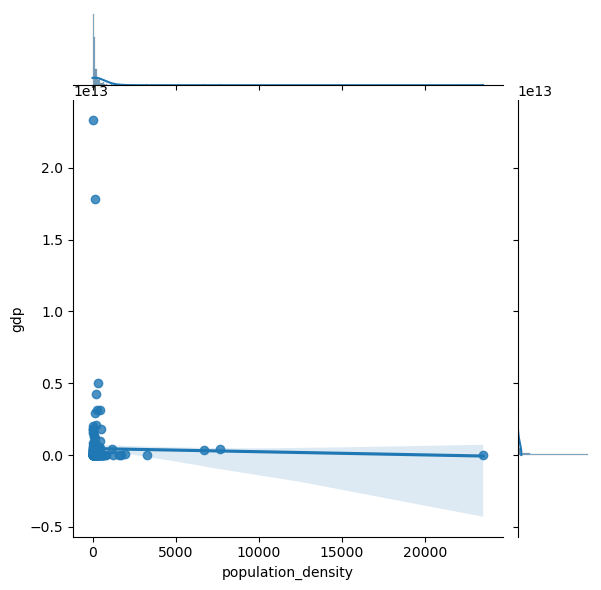

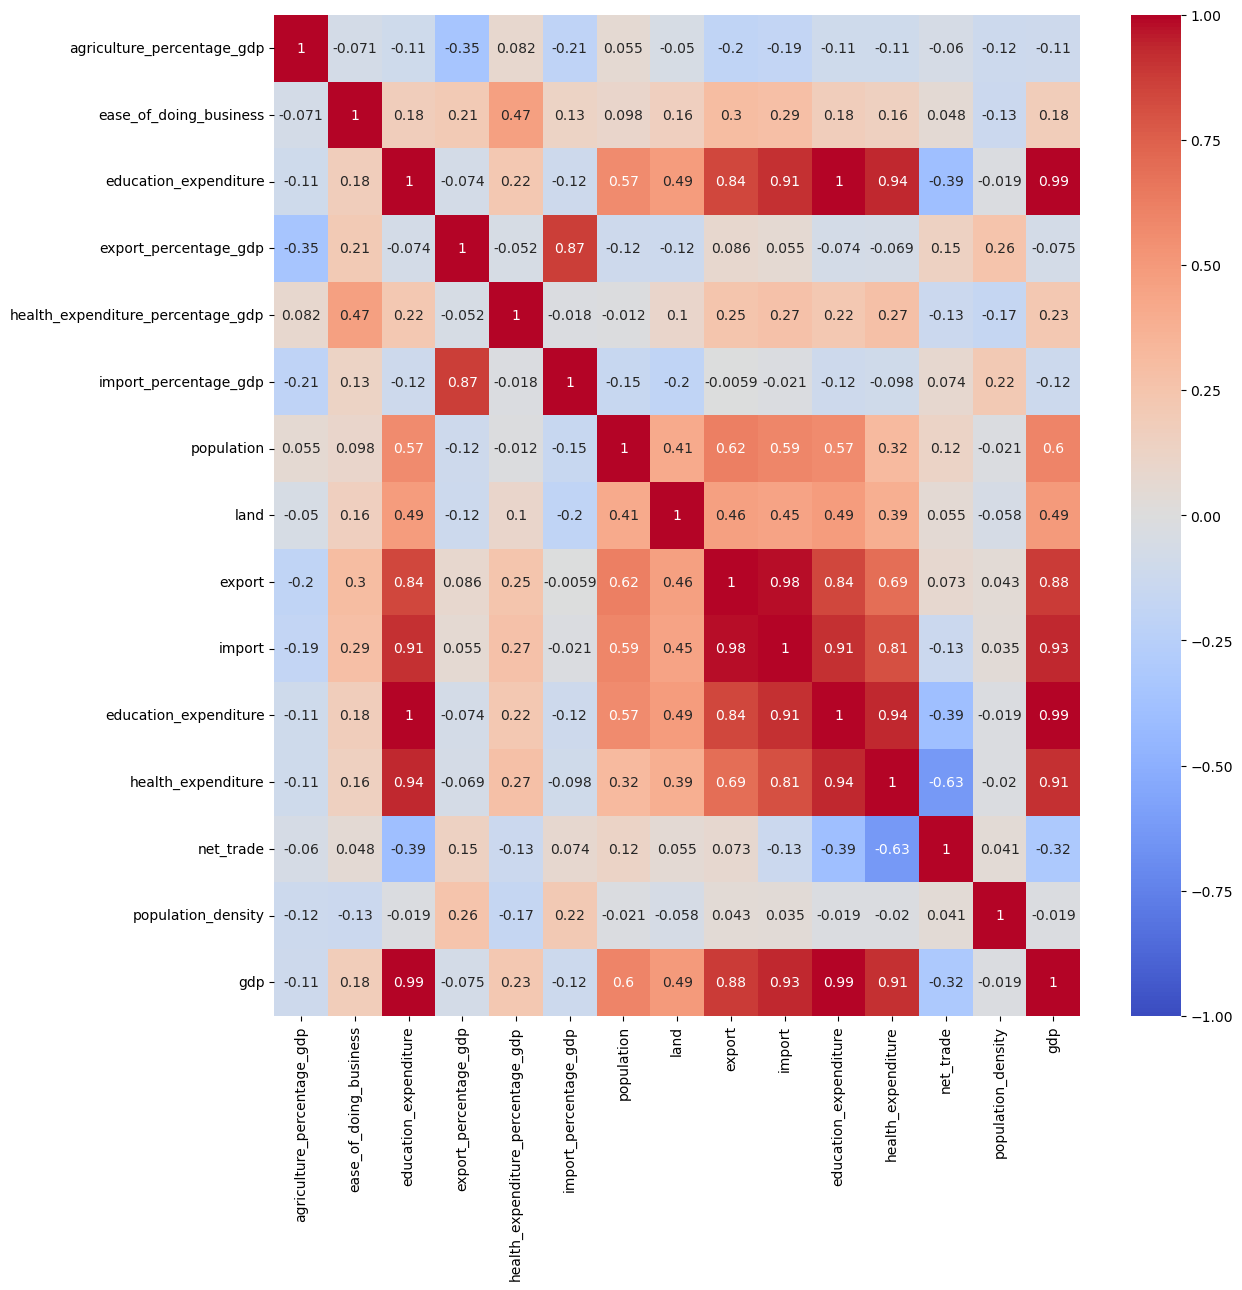

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


###############################################################################
Variance Inflaction Factors
       const  agriculture_percentage_gdp  ease_of_doing_business  \
0  10.559708                    1.310297                1.568897   

   education_expenditure  export_percentage_gdp  \
0                    inf               5.651061   

   health_expenditure_percentage_gdp  import_percentage_gdp  population  \
0                           1.531169               4.929986    4.907831   

       land  export  import  education_expenditure  health_expenditure  \
0  1.744925     inf     inf                    inf           72.883966   

   net_trade  population_density  
0        inf            1.145322  
###############################################################################
###############################################################################
Checking Normality


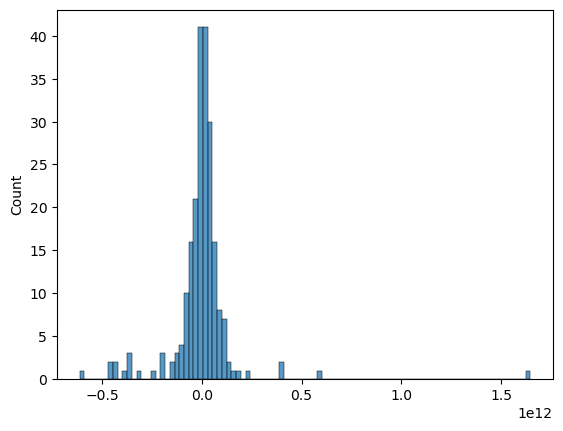

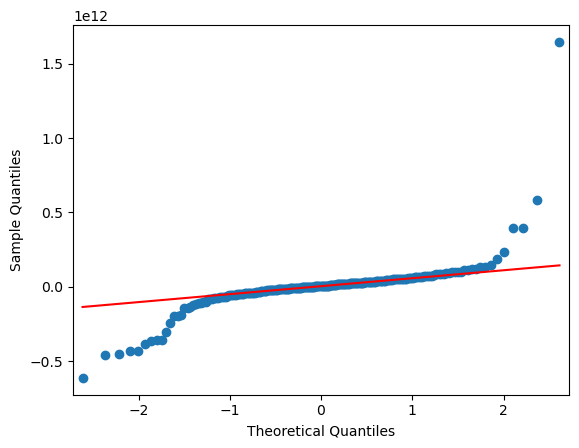

###############################################################################


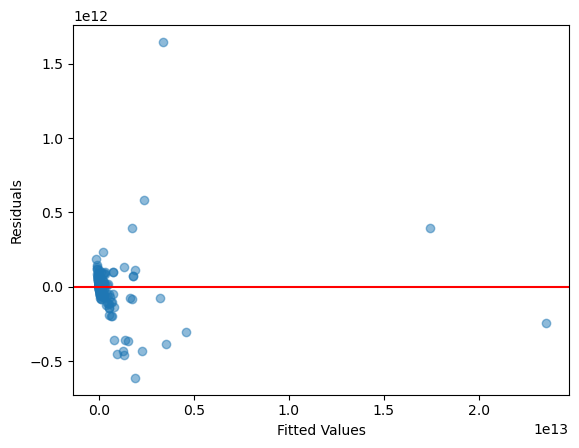

In [12]:
ctp_model = ctp.CTP_LinReg(df=df_2021, independent_variables=X_var, dependent_variable=y_var)
ctp_model.run_all()